# columns description

https://archive.ics.uci.edu/ml/datasets/wine+quality

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):


1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

# read data

In [1]:
import pandas as pd

In [2]:
raw_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv')

In [3]:
raw_data

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
...,...
4893,6.2;0.21;0.29;1.6;0.039;24;92;0.99114;3.27;0.5...
4894,6.6;0.32;0.36;8;0.047;57;168;0.9949;3.15;0.46;...
4895,6.5;0.24;0.19;1.2;0.041;30;111;0.99254;2.99;0....
4896,5.5;0.29;0.3;1.1;0.022;20;110;0.98869;3.34;0.3...


# Preprocessing

In [4]:
from numpy import double
def action(s,i):
  return double(s.split(";")[i])

In [5]:
t=0
for i in raw_data.columns[0].split(";"):
  raw_data[i]=raw_data['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].apply(lambda x : action(x,t))
  t+=1

In [6]:
raw_data.drop(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'],axis=1,inplace=True)

In [7]:
raw_data.isna().sum()

fixed acidity             0
"volatile acidity"        0
"citric acid"             0
"residual sugar"          0
"chlorides"               0
"free sulfur dioxide"     0
"total sulfur dioxide"    0
"density"                 0
"pH"                      0
"sulphates"               0
"alcohol"                 0
"quality"                 0
dtype: int64

In [8]:
raw_data

,fixed acidity,"""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


In [44]:
raw_data.describe()

,fixed acidity,"""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Questions

1) Quality?

2) correlation?

3) find diffrend value base on a few columns

### Data Plot

In [9]:
import matplotlib.pyplot as plt


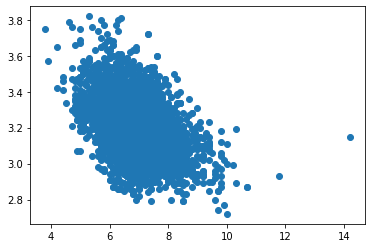

In [10]:
plt.scatter(raw_data['fixed acidity'],raw_data['"pH"'])

In [11]:
raw_data.corr()

,fixed acidity,"""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
"""volatile acidity""",-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
"""citric acid""",0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
"""residual sugar""",0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
"""chlorides""",0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
"""free sulfur dioxide""",-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
"""total sulfur dioxide""",0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
"""density""",0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
"""pH""",-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
"""sulphates""",-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


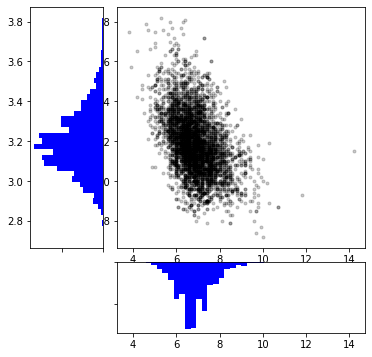

In [12]:
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(raw_data['fixed acidity'],raw_data['"pH"'], 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(raw_data['fixed acidity'], 40, histtype='stepfilled',
            orientation='vertical', color='blue')
x_hist.invert_yaxis()

y_hist.hist(raw_data['"pH"'], 40, histtype='stepfilled',
            orientation='horizontal', color='blue')
y_hist.invert_xaxis()

In [13]:
import seaborn as sb

https://seaborn.pydata.org/tutorial/distributions.html

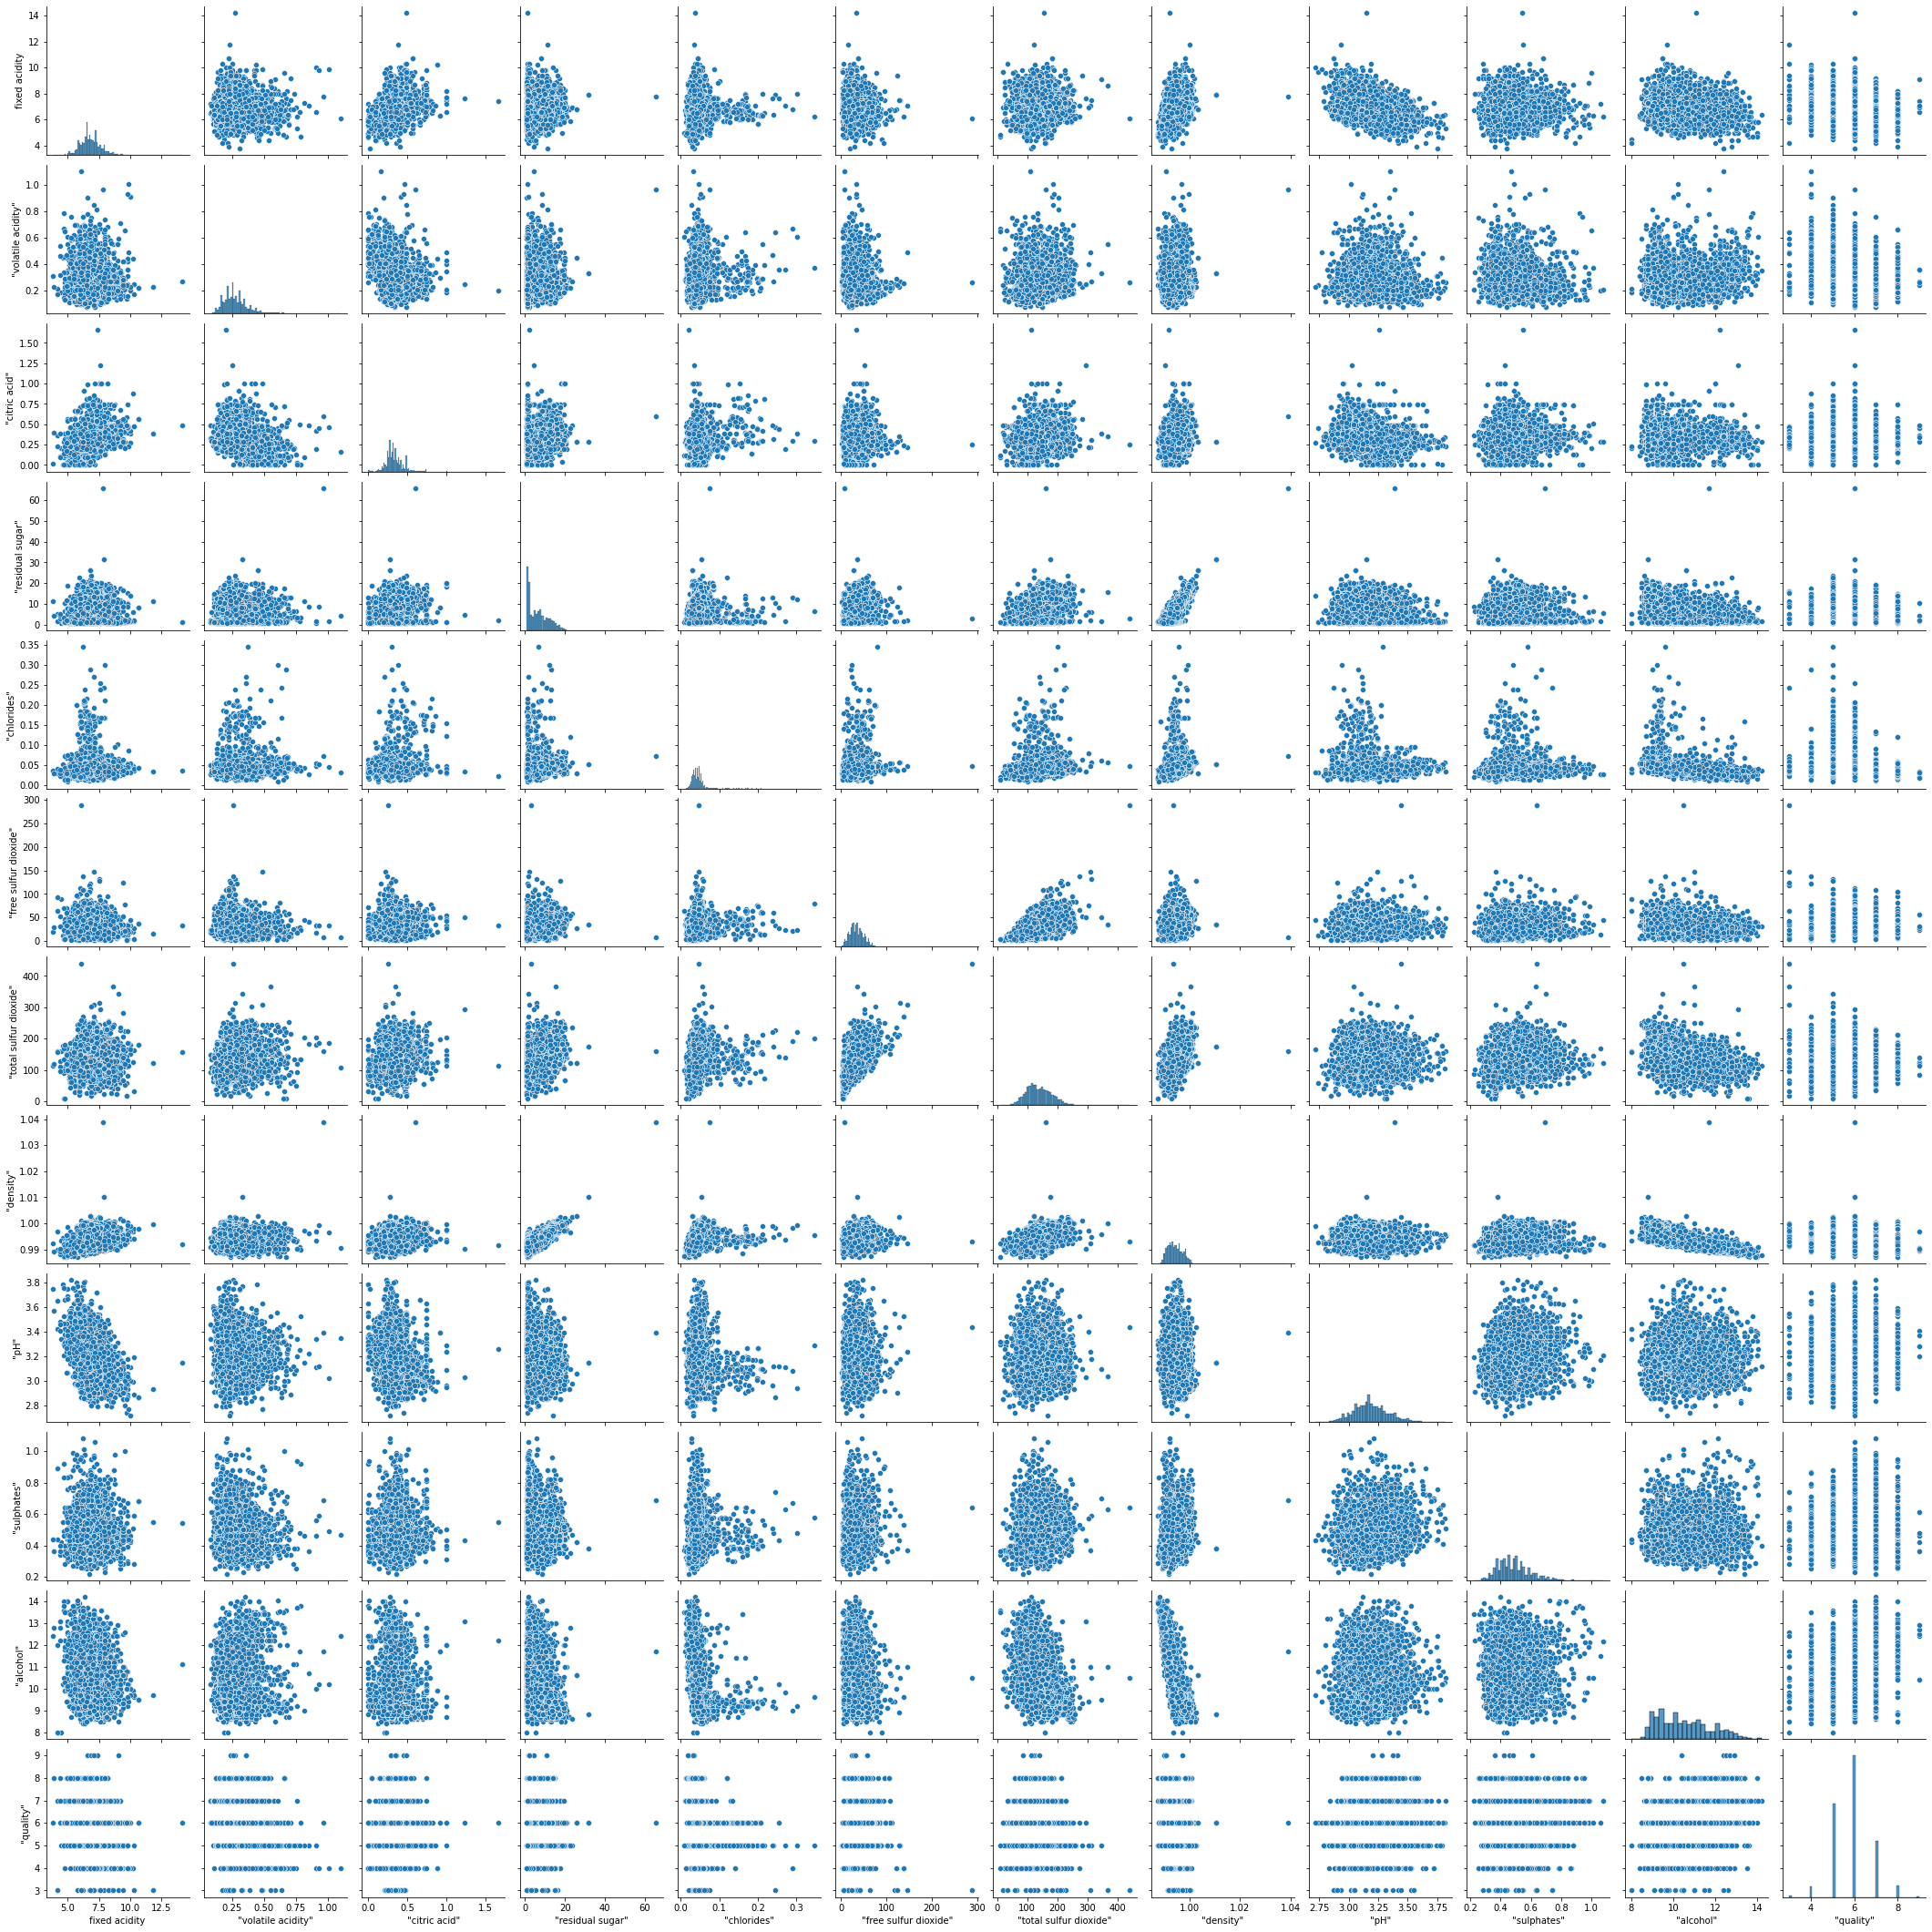

In [14]:
sb.pairplot(raw_data)

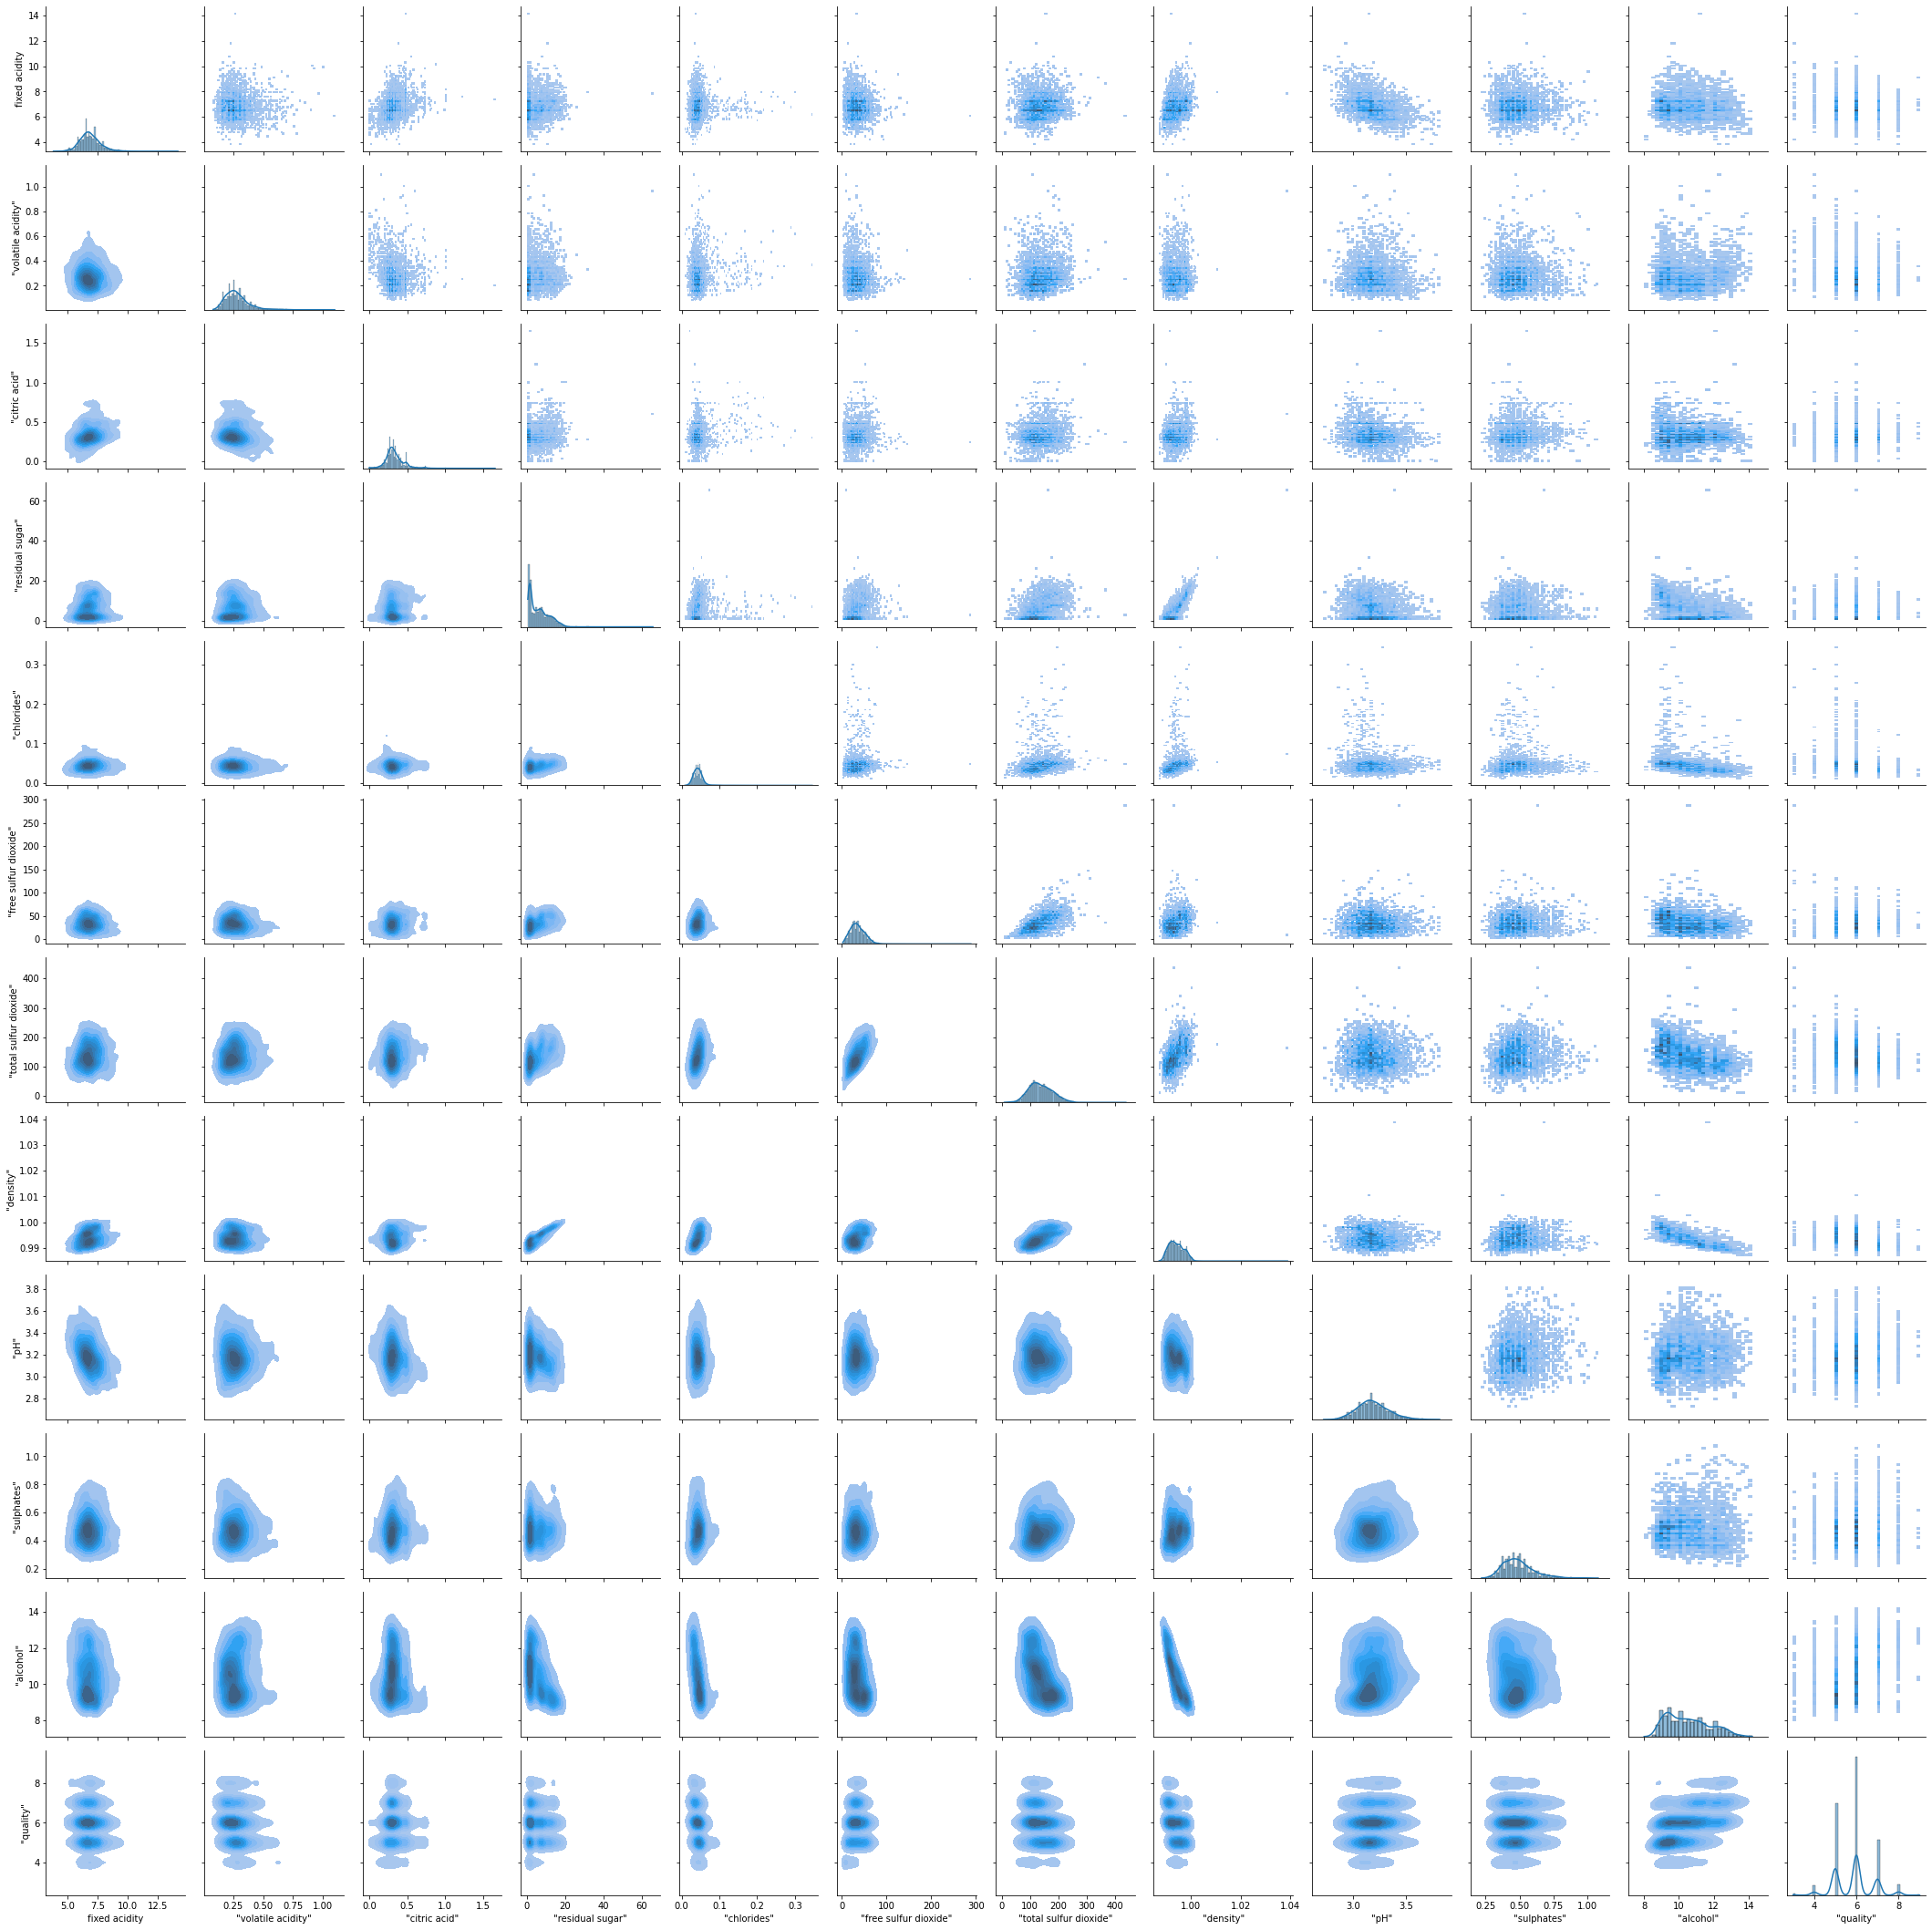

In [15]:
g = sb.PairGrid(raw_data)
g.map_upper(sb.histplot)
g.map_lower(sb.kdeplot, fill=True)
g.map_diag(sb.histplot, kde=True)

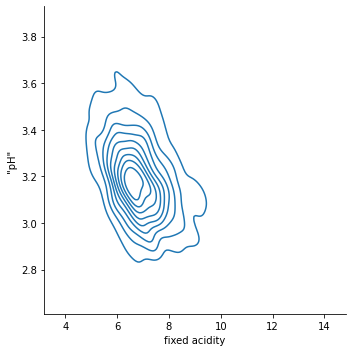

In [16]:
sb.displot(raw_data, x='fixed acidity', y='"pH"', kind="kde")


### model selection

we have to use the different models if we can't make a proper decision that some model is the best base on logic, sometimes we don't know which submodel works better, and sometimes it needs data to find the answer

In [17]:
from sklearn import linear_model

In [18]:
reg_1 = linear_model.LinearRegression()
reg_2 = linear_model.Lasso(alpha=0.5)
reg_3 = linear_model.Ridge(alpha=.5)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(  raw_data.drop(['"quality"'],axis=1), raw_data['"quality"'], test_size=0.2, random_state=1234)

In [21]:
reg_1.fit(X_train,y_train)
reg_2.fit(X_train,y_train)
reg_3.fit(X_train,y_train)

Ridge(alpha=0.5)

In [22]:
import numpy as np

In [23]:
def sigmoid(x):
  if(x*10%10>=5):
     return int(x)+1
  else:
    return int(x)

In [24]:
list_1=[]
for x in reg_1.predict(X_test):
  list_1.append(sigmoid(x))

list_2=[]
for x in reg_2.predict(X_test):
  list_2.append(sigmoid(x))

list_3=[]
for x in reg_3.predict(X_test):
  list_3.append(sigmoid(x))


In [25]:
print(((np.array(list_1)-y_test)*(np.array(list_1)-y_test)).mean(),"1")
print(((np.array(list_2)-y_test)*(np.array(list_2)-y_test)).mean(),"2")
print(((np.array(list_3)-y_test)*(np.array(list_3)-y_test)).mean(),"3")

0.7112244897959183 1
0.8183673469387756 2
0.6632653061224489 3


### set hyper parameters

we have to find the best possible values for our hyper parameters so we have to guess it base on the result of different hyper parameters and use it base on what we find


In [26]:
m=1000
A=np.zeros(m)
for i in range(m):
  reg_2 = linear_model.Lasso(alpha=i/m)
  list_2=[]
  reg_2.fit(X_train,y_train)
  for x in reg_2.predict(X_test):
    list_2.append(sigmoid(x))
  A[i]=((np.array(list_2)-y_test)*(np.array(list_2)-y_test)).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+03, tolerance: 3.059e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

we plot the result of what we find

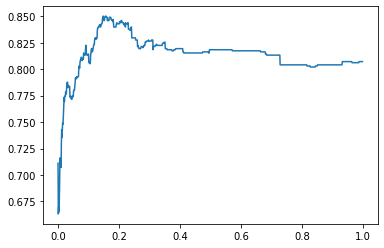

In [27]:
plt.plot([i/m for i in range(m)],A)

# *Dimension reduction*

## SVD

there are different ways of dimension reduction for example, we can use linear algebra methods like SVD, we can use SVD on the data or our X and base on what we need to get some of the highest engine vectors and base on that we can reduce the dimension of data 

In [28]:
A=np.array(raw_data.drop(['"quality"'],axis=1)) 

In [29]:
U, S, V = np.linalg.svd(A)

In [30]:
# Sigma = np.zeros((A.shape[0], A.shape[1]))

# Sigma[:A.shape[1], :A.shape[1]] = np.diag(S)

# B = U.dot(Sigma.dot(VT))


In [31]:
c=8

In [32]:
from sklearn.decomposition import TruncatedSVD
svd =  TruncatedSVD(n_components = c)
A_transf = svd.fit_transform(A)

In [33]:
A_transf.shape

(4898, 8)

## PCA

we can use PCA to dimention reduction like this

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=c)
principalComponents = pca.fit_transform(A)

In [35]:
principalComponents.shape

(4898, 8)

#**Classification**

## KNN

we can use KNN for classification as we saw on the course 

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(A, np.array(raw_data['"quality"']).reshape(-1,1))  
y_predict = classifier.predict(A)
classifier.score(A,np.array(raw_data['"quality"']).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6565945283789302

##Decision Tree

https://scikit-learn.org/stable/modules/tree.html

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)
clf_en.fit(X_train, y_train)
# y_pred_en = clf_en.predict(X_test)

In [41]:
clf_en.score(X_test,y_test)

0.5326530612244897

In [42]:
A=np.zeros(100)
for i in range(1,100):
  clf = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=1234)
  clf.fit(X_train, y_train)
  A[i]=clf.score(X_test,y_test)

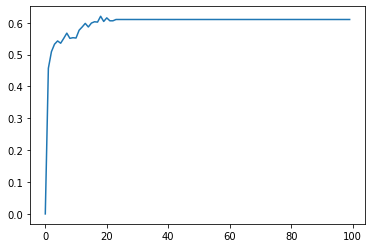

In [43]:
plt.plot([i for i in range(100)],A)